# SymPy

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

### Intro
SymPy is a symbolic library
How we define symbols?

In [2]:
x= smp.symbols('x')

In [3]:
y=smp.sin(x**2)

In [4]:
z=y-x**2
z

-x**2 + sin(x**2)

smp.? to give a look at the functions that sympy can do

You can save expression in new variables

In [5]:
y= x**2+ 4*x + 3

In [6]:
y

x**2 + 4*x + 3

Do operations on the new variables:

In [7]:
z= y**2
z

(x**2 + 4*x + 3)**2

It's not expanded

In [8]:
z.factor()

(x + 1)**2*(x + 3)**2

In [9]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In the notation smp.solve(f,x) finds the value of $x$ that maxes $f(x)=0$

In [10]:
smp.solve(z,x)

[-3, -1]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [11]:
x=smp.symbols('x')
smp.solve(x**2+1,x)

[-I, I]

In [12]:
x=smp.symbols('x', real=True)
smp.solve(x**2+1,x)

[]

Declaring many variables at once 

In [13]:
x,y,z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we are solving for. In each case $F=0$ is being solved for

In [14]:
x_sols =smp.solve(F,x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [15]:
y_sols= smp.solve(F,y)
z_sols=smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the caser that one has a sympy expressio but want to convert to a numerical function so they can plot.

In [16]:
expr= z_sols[0]   #its an array
expr

asin(x**2/y) + pi

In [17]:
expr_f=smp.lambdify([x,y],expr) #Pass the symbols in the expression
expr_f(1,2)

3.665191429188092

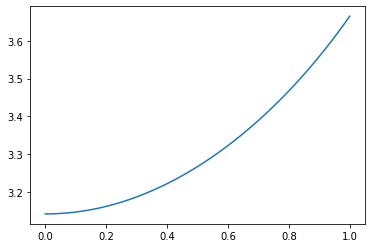

In [18]:
x_num = np.linspace(0,1,100)
y_num=2
plt.plot(x_num,expr_f(x_num,y_num))

For multivariable expressions can also substitute values in

In [19]:
F

x**2 + y*sin(z)

In [20]:
F.subs([(y,3),(z,smp.pi/2)])   #does the substitution in the order you decide 

x**2 + 3

In [21]:
F.subs([(x,smp.cos(z))])

y*sin(z) + cos(z)**2

In [22]:
F

x**2 + y*sin(z)

### Examples 

A falling object encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [23]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)
#expressions
h0t = h0 -v0*t - smp.Rational(1/2) *g*t**2
dh0dt = -v0+ g*t
hpt= vp*t +smp.Rational(1/2)*q*t**2
dhpdt = vp + q*t
#equations
eq1=h0t-hpt
eq2=dh0dt + dhpdt

In [24]:
t_collide, v_initfall = smp.solve([eq1,eq2], [t,v0])[0]

In [25]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

**What is the velocity when they collide**

In [26]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

-(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [27]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

### Calculus 1 

#### Limits 

In [28]:
x = smp.symbols(' x ')

In [29]:
smp.limit(smp.sin(x/2+smp.sin(x)),x,smp.pi)

1

#### Derivatives 

In [30]:
smp.diff(((1 + smp.sin(x))/(1 - smp.cos(x)))**2,x) #respect to x

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [31]:
#also with generic functions
f, g= smp.symbols('f g', cls=smp.Function)
g=g(x)
f=f(x+g)
f

f(x + g(x))

In [32]:
dfdx=smp.diff(f,x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [33]:
dfdx.subs([(g, smp.sin(x))]).doit() #without doit it will subs sin(x) but it won't calculate explicitly the derivative

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

#### Basic Antiderivatives 

In [34]:
smp.integrate(smp.csc(x)*smp.cot(x),x)  #no plus c

-1/sin(x)

In [35]:
smp.integrate(smp.exp(x)/ smp.sqrt(smp.exp(2*x)+9),(x, 0, smp.log(9)))

-asinh(1/3) + asinh(3)

In [36]:
t = smp.symbols('t')
smp.integrate(x**10*smp.exp(x),(x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

### Examples 

The hydrogen wave function is given by

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

The mean distance from the nucleus of the electron:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

The standard deviation in the distance from the nucleus of the electron:

$$\sigma = \sqrt{\left<r^2\right> - \left<r\right>^2} =  \sqrt{\left(\int_{0}^{\infty}R_{nl}^2 r^4 dr\right) - \left(\int_{0}^{\infty} R_{nl}^2 r^3 dr\right)^2}$$

In [37]:
from sympy import assoc_laguerre

In [38]:
r, a = smp.symbols('r a', real=True, positive= True)
n, l=smp.symbols('n l', integer=True, positive=True)

In [39]:
R = smp.sqrt((2/(n*a))**3 * smp.factorial(n-l-1)/(2*n*(smp.factorial(n+l)))) \
     *smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n-l-1,2*l+1,(2*r/(n*a)))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

I wanna check to make sure this corresponds to the radial wavefunctions.
For the ground state $\longrightarrow R_{1,0}(r)$... let's see

In [40]:
R_10 = R.subs([(n,1),(l,0)])
R_10

2*exp(-r/a)/a**(3/2)

$\int^\infty_0 R^2_{n,l}r^k dr$ for $n$,$l$,$k$ generic

In [41]:
def compute_int(n_val, l_val, k):
    R_nl = R.subs([(n,n_val),(l,l_val)])
    return smp.integrate(R_nl**2 * r**k, (r,0,smp.oo))

In [42]:
compute_int(1,0,3)

3*a/2

In [43]:
smp.sqrt(compute_int(1,0,4)- compute_int(1,0,3)**2)

sqrt(3)*a/2

In [44]:
def compute_mean_distance(n_val, l_val=0):
    expr = compute_int(n_val,l_val,k=3)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

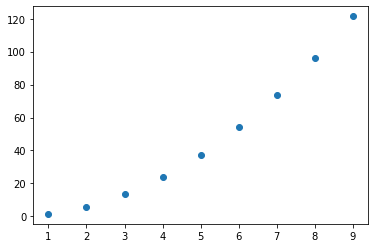

In [45]:
ns = np.arange(1,10)
ds = [compute_mean_distance(ni) for ni in ns]
plt.scatter(ns, ds)

### Multivariable calculus


In [46]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

In [49]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])
u

Matrix([
[u_1],
[u_2],
[u_3]])

In [50]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

In [51]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

In [52]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

In [53]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

In [57]:
proj_v_u= u.dot(v)/v.norm()**2 *v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

$\vec{r}(t) = \vec{r}_0 + t \vec{v}$

In [58]:
r0=smp.Matrix([1,1,1])
v=smp.Matrix([1,3,-1])
r=r0+v*t
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

### Vec calculus 

In [59]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [60]:
smp.diff(r,t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [64]:
v=smp.diff(r,t)
a=smp.diff(v,t)
ctheta=v.dot(a)/(v.norm()*a.norm())
theta = smp.acos(ctheta).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [65]:
theta.subs(t,6)

acos((24 - sin(12)/2)/(sqrt(sin(6)**2 + 4)*sqrt(cos(6)**2 + 153)))

In [67]:
theta.subs(t,6).evalf()

0.251108015692338

### Vector Integrals

(Note: Will not add the +C)

In [68]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [70]:
smp.Integral(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

In [71]:
#Sometimes there is not an analitcally sol
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [74]:
r_num=smp.lambdify([t],r)
r_num(0)

array([[1.        ],
       [1.        ],
       [0.33333333]])

In [75]:
quad_vec(r_num,0,1)[0]

array([[0.81549671],
       [0.84483859],
       [0.30229989]])

In [76]:
quad_vec(r_num,0,1)  #also error

(array([[0.81549671],
        [0.84483859],
        [0.30229989]]),
 4.039233845603321e-14)

### Arclength

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [77]:
r= smp.Matrix([0,t,t**2])
smp.integrate(smp.diff(r,t),(t,0,1))

Matrix([
[0],
[1],
[1]])

# Examples

The magnetic field at a point $\vec{r}$ of a current configuration is 

$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

where $\vec{r} = (x,y,z)$ and $\vec{l} = (f(t), g(t), h(t))$ is a 1D curve in space that gives the location of the wire.

**Part 1: Use Sympy to find the integrand as a single 3-vector**

In [ ]:
r=smp.Matrix([x,y,z])

In [78]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h ',cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)
r=smp.Matrix([x,y,z])
l= smp.Matrix([f,g,h])
dldt=smp.diff(l,t)
dldt

Matrix([
[Derivative(f(t), t)],
[Derivative(g(t), t)],
[Derivative(h(t), t)]])

In [79]:
r.norm()

sqrt(x**2 + y**2 + z**2)

In [93]:
dBdt = I* dldt.cross(r-l)/(r-l).norm()**3 #maybe missing the square 
dBdt


Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

**Part 2**: Find the magnetic field a distance $H$ above a ring of radius $R$ flowing clockwise

In [96]:
R, H = smp.symbols('R H', real=True)
dBdt= dBdt.subs([(f, R*smp.cos(t)),
                (g,R*smp.sin(t)),
                (h,0),
                (x,0),(y,0),(z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

## Partial/Directional Derivatives

partial derivatives respect to $x$ and $y$ of $f(x,y)=y^2 \sin{(x+y)}$

In [98]:
x, y, z = smp.symbols('x y z')
f=x**2 * smp.sin(x+y)
dfdx=smp.diff(f,x)
dfdy=smp.diff(f,y)
dfdx

x**2*cos(x + y) + 2*x*sin(x + y)

More compkicatet like $\frac{\partial^3 f}{\partial x \partial^2 y}$

In [99]:
smp.diff(f,y,y,x)

-x*(x*cos(x + y) + 2*sin(x + y))

### The Chain Rule

* Suppose $x$, $y$, and $z$ are functions of $t$ 
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [101]:
t = smp.symbols('t')
x, y, z, w = smp.symbols('x y z w', cls=smp.Function)
x=x(t)
y=y(t)
z=z(t)
w=w(x,y,z)
dwdt =smp.diff(w,t)
dwdt

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions:

In [104]:
w1 = x**2+smp.exp(y)*smp.sin(z)
w1

x(t)**2 + exp(y(t))*sin(z(t))

In [105]:
smp.diff(w1,t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [106]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [107]:
x, y, z= smp.symbols('x y z')
f=x
smp.integrate(f, (z,3,4-x**2-y**2), (y,0,1-x**2), (x,0,1))

1/8

## Lagrangian Mechanics

The (simplified) idea of Lagrangian mechanics is the that kinetic energy and potential energy of a system can be expressed in terms of generalized coordinates and velocity

$$T = T(q,\dot{q}) \hspace{20mm} V=V(q,\dot{q})$$

where $q$ could be xyz of a point particle, or some angle $\theta$ (pendulum), or whatever makes the problem easiest to solve. The defining $L=T-V$, the following equation gives the equations of motion $q(t)$

$$\frac{dL}{dq} - \frac{d}{dt}\frac{dL}{d\dot{q}} = 0 $$

for all the different $q$'s of the system. The equation above gives a second order differential equation for all the different $q(t)$s.

**Example**: Find the equations of motion (in the form of differential equations)

In [112]:
t, R, g, m1, m2 = smp.symbols('t R g m_1 m_2')
z, theta = smp.symbols(r'z \theta', cls=smp.Function)
z=z(t)
theta=theta(t)
dzdt = smp.diff(z,t)
dthdt = smp.diff(theta, t)
#location of the pendulum
x= z + R*smp.sin(theta)
y= -R*smp.cos(theta)
# T and V
T1= smp.Rational(1,2)*m1*(dzdt)**2
T2= smp.Rational(1,2)* m2*(smp.diff(y,t)**2 + smp.diff(x,t)**2)
T = T1 + T2
V1=0
V2= m2*g*y
V=V1+V2
L= T-V
#EOM
LE1= smp.diff(L,z) - smp.diff(smp.diff(L,dzdt),t)
LE2= smp.diff(L,theta) - smp.diff(smp.diff(L,dthdt),t)
LE1

-m_1*Derivative(z(t), (t, 2)) - m_2*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(z(t), (t, 2)))/2

We want a system of two second order differential equations that we can solve

In [113]:
sols = smp.solve([LE1,LE2],[smp.diff(z,t,t),smp.diff(theta,t,t)])

It returns it like a dict

In [114]:
sols[smp.diff(theta,t,t)]

-R*m_2*sin(\theta(t))*cos(\theta(t))*Derivative(\theta(t), t)**2/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_1*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2) - g*m_2*sin(\theta(t))/(R*m_1*sin(\theta(t))**2 + R*m_1*cos(\theta(t))**2 + R*m_2*sin(\theta(t))**2)

In [115]:
sols[smp.diff(z,t,t)]

R*m_2*sin(\theta(t))**3*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + R*m_2*sin(\theta(t))*cos(\theta(t))**2*Derivative(\theta(t), t)**2/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2) + g*m_2*sin(\theta(t))*cos(\theta(t))/(m_1*sin(\theta(t))**2 + m_1*cos(\theta(t))**2 + m_2*sin(\theta(t))**2)